In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings

In [126]:
df = pd.read_csv('D:/류영표강사20230501/archive/insurance.csv')

In [127]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [128]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [129]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [131]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [132]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [133]:
df["sex"].unique()

array(['female', 'male'], dtype=object)

In [134]:
df["sex"] = df["sex"].map({"female":0, "male":1})

In [135]:
df["sex"]

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex, Length: 1338, dtype: int64

In [136]:
df["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [137]:
df["smoker"] = df["smoker"].map({"yes":0, "no":1})

In [138]:
df["smoker"]

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    1
1335    1
1336    1
1337    0
Name: smoker, Length: 1338, dtype: int64

In [139]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [140]:
df["region"] = df["region"].map({"southwest":0, "southeast":1, "northwest":2, "northeast":3})

In [141]:
df["region"]

0       0
1       1
2       1
3       2
4       2
       ..
1333    2
1334    3
1335    1
1336    0
1337    2
Name: region, Length: 1338, dtype: int64

In [142]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


In [143]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [169]:
# 상관계수 행렬 생성
corr_matrix = df.corr()
corr_matrix

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,0.025019,-0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,-0.076185,-0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,-0.003750,-0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,-0.007673,-0.016569,0.067998
smoker,0.025019,-0.076185,-0.003750,-0.007673,1.000000,-0.002181,-0.787251
region,-0.002127,-0.004588,-0.157566,-0.016569,-0.002181,1.000000,0.006208
charges,0.299008,0.057292,0.198341,0.067998,-0.787251,0.006208,1.000000


In [180]:
# 상관계수 구하기
corr_df = corr_matrix.loc[:,'charges'].abs().sort_values(ascending=True)
corr_df

region      0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

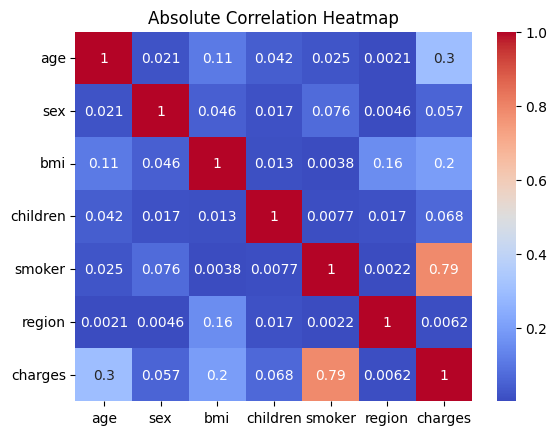

In [182]:
# 상관계수 행렬 생성
corr_matrix = df.corr()

# 절댓값 적용
abs_corr_matrix = np.abs(corr_matrix)

# 히트맵 그리기
sns.heatmap(abs_corr_matrix, cmap='coolwarm', annot=True)

# 플롯 제목 설정
plt.title("Absolute Correlation Heatmap")

# 그래프 출력
plt.show()

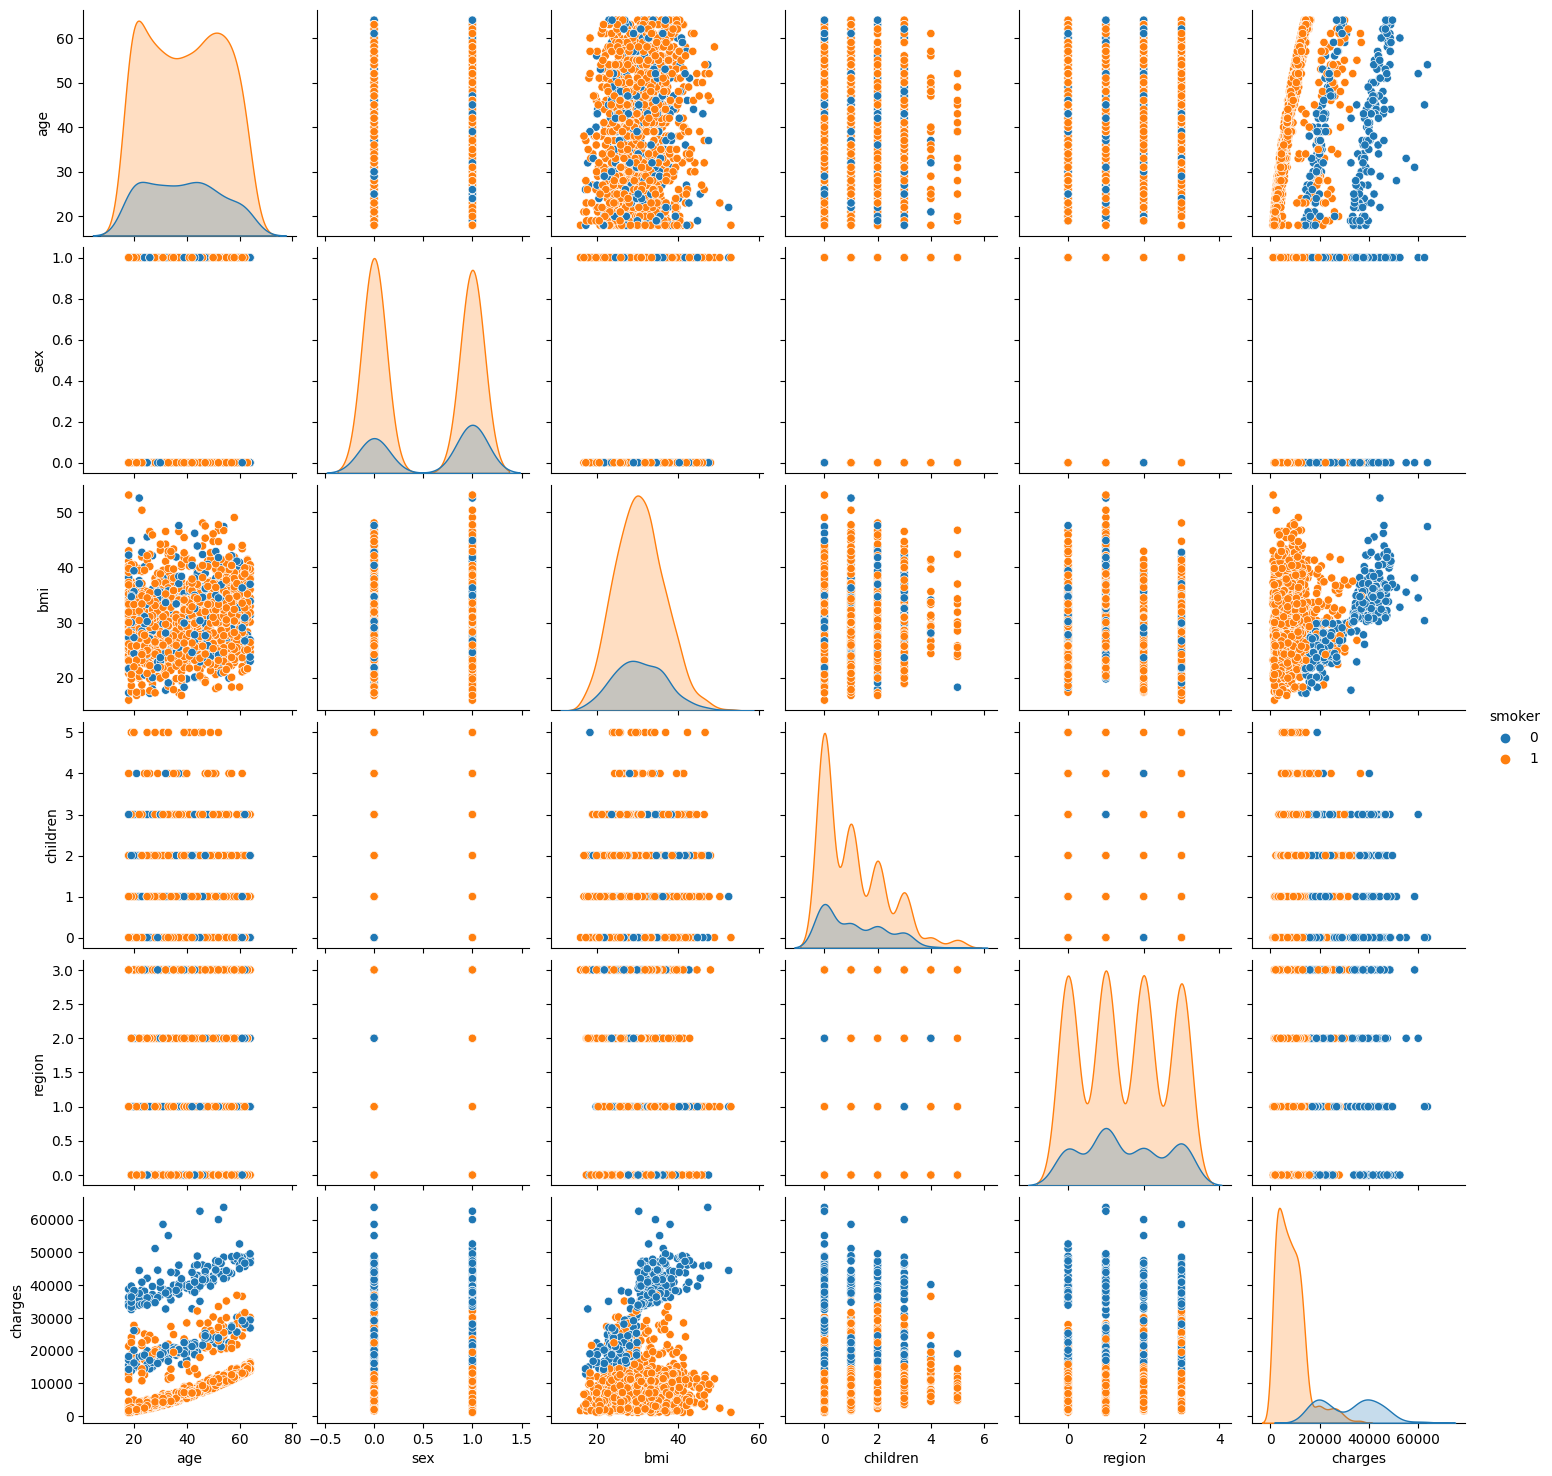

In [183]:
sns.pairplot(df, hue='smoker')

In [148]:
#separating the features and label
X = df.drop(["charges"], axis=1)

In [149]:
y = df["charges"]

# Train & Test Split

In [150]:
#splitting X,Y into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [151]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [152]:
X_train

,age,sex,bmi,children,smoker,region
560,46,0,19.950,2,1,2
1285,47,0,24.320,0,1,3
1142,52,0,24.860,0,1,1
969,39,0,34.320,5,1,1
486,54,0,21.470,3,1,2
...,...,...,...,...,...,...
1095,18,0,31.350,4,1,3
1130,39,0,23.870,5,1,1
1294,58,1,25.175,0,1,3
860,37,0,47.600,2,0,0


In [153]:
y_train

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

# Model Training    

In [154]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [155]:
from sklearn.svm import SVR #support vector regressor
svm = SVR()
svm.fit(X_train, y_train)

SVR()

In [156]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [157]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

# Prediction on Test Data

In [158]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gbr.predict(X_test)

df1 = pd.DataFrame({"Actual":y_test, "lr":y_pred1, "svm":y_pred2, "rf":y_pred3, "gbr":y_pred4})

In [159]:
df1

,Actual,lr,svm,rf,gbr
764,9095.06825,8924.407244,9548.340804,10803.196244,11001.128629
887,5272.17580,7116.295018,9492.758696,5195.657167,5840.174656
890,29330.98315,36909.013521,9648.606829,28373.864502,28001.980112
1293,9301.89355,9507.874691,9555.103129,10058.355333,9745.291602
259,33750.29180,27013.350008,9420.768462,34779.501787,33639.100981
...,...,...,...,...,...
109,47055.53210,39116.968669,9648.743773,47159.751649,45431.423211
575,12222.89830,11814.555568,9625.305132,13024.035503,12465.025294
535,6067.12675,7638.107736,9504.378670,6357.405156,6974.336525
543,63770.42801,40959.081722,9604.955520,46396.870060,47862.047791
